In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import numpy as np
from sklearn import linear_model

n_sample, n_feature = 1, 500

X = np.random.randn(n_sample, n_feature)
y = np.random.randint(2, size=n_sample)  # Generate random binary labels (0 or 1)

clf = linear_model.SGDClassifier()
import time

start_time = time.time()

# First call to partial_fit with classes parameter
clf.partial_fit(X, y, classes=np.unique(y))

# Additional calls to partial_fit if needed
# clf.partial_fit(X_new, y_new)



ValueError: The number of classes has to be greater than one; got 1 class

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# Perform EDA on the Dataset Which should include 

In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2200\1535623934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bedrooms'])


<AxesSubplot: xlabel='total_bedrooms', ylabel='Density'>

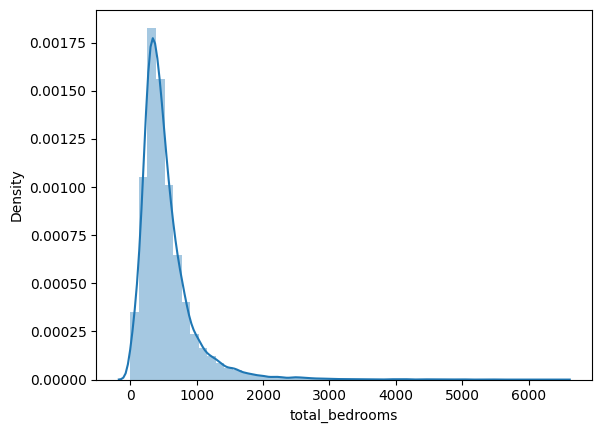

In [7]:
sns.distplot(df['total_bedrooms'])

## Missing Values Shown in heatmap

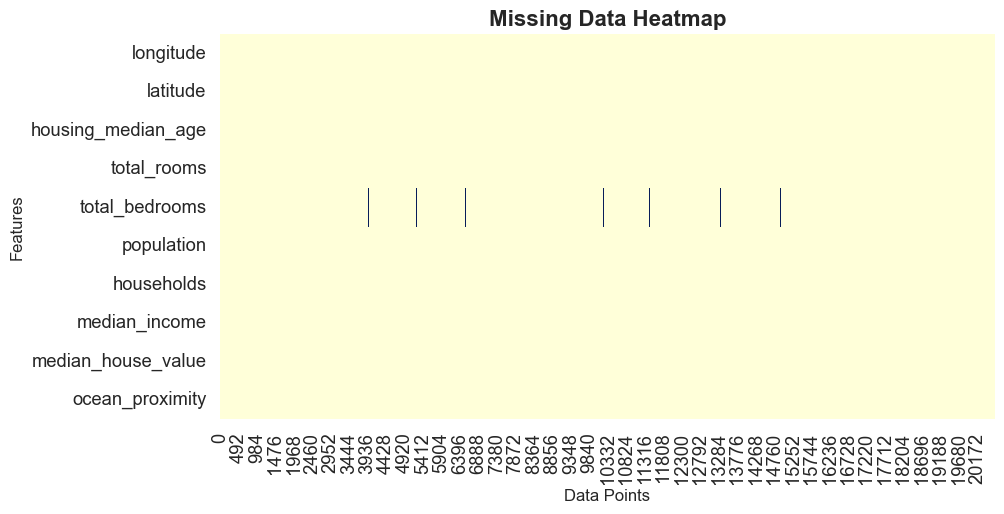

In [8]:
# Set the figure size and style
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid", font_scale=1.2)

# Create a heatmap to visualize missing values
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar=False)

# Add title and adjust plot aesthetics
plt.title("Missing Data Heatmap", fontsize=16, weight="bold")
plt.ylabel("Features", fontsize=12)
plt.xlabel("Data Points", fontsize=12)

plt.yticks(rotation=0)
# plt.xticks(rotation=45)
# Show the plot
plt.show()


In [9]:
df.fillna(df.mean(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2200\820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


## After adding the missing value in the dataset not effect data shape that is good

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2200\1535623934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bedrooms'])


<AxesSubplot: xlabel='total_bedrooms', ylabel='Density'>

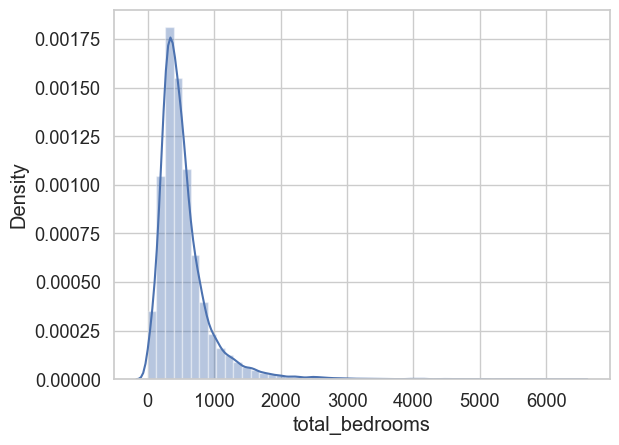

In [10]:
sns.distplot(df['total_bedrooms'])

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df.shape

(20640, 10)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2200\2418178514.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


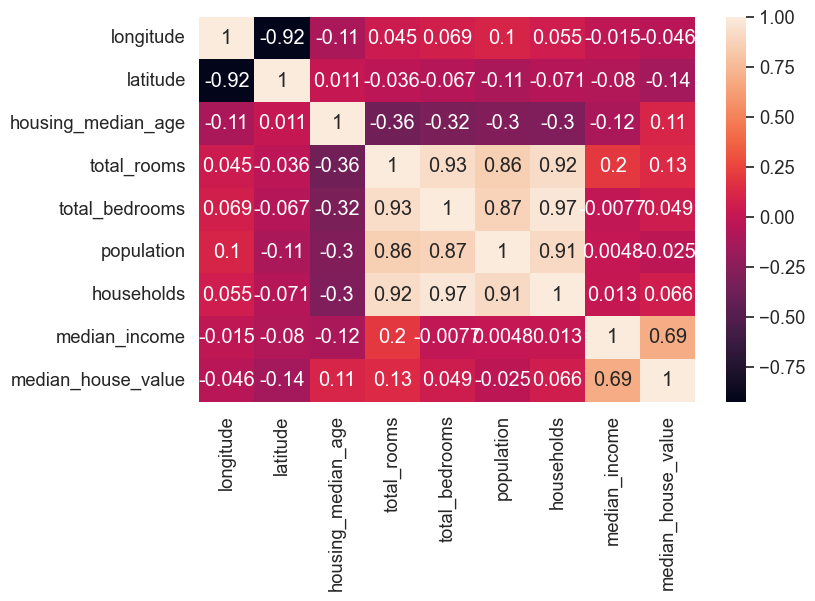

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

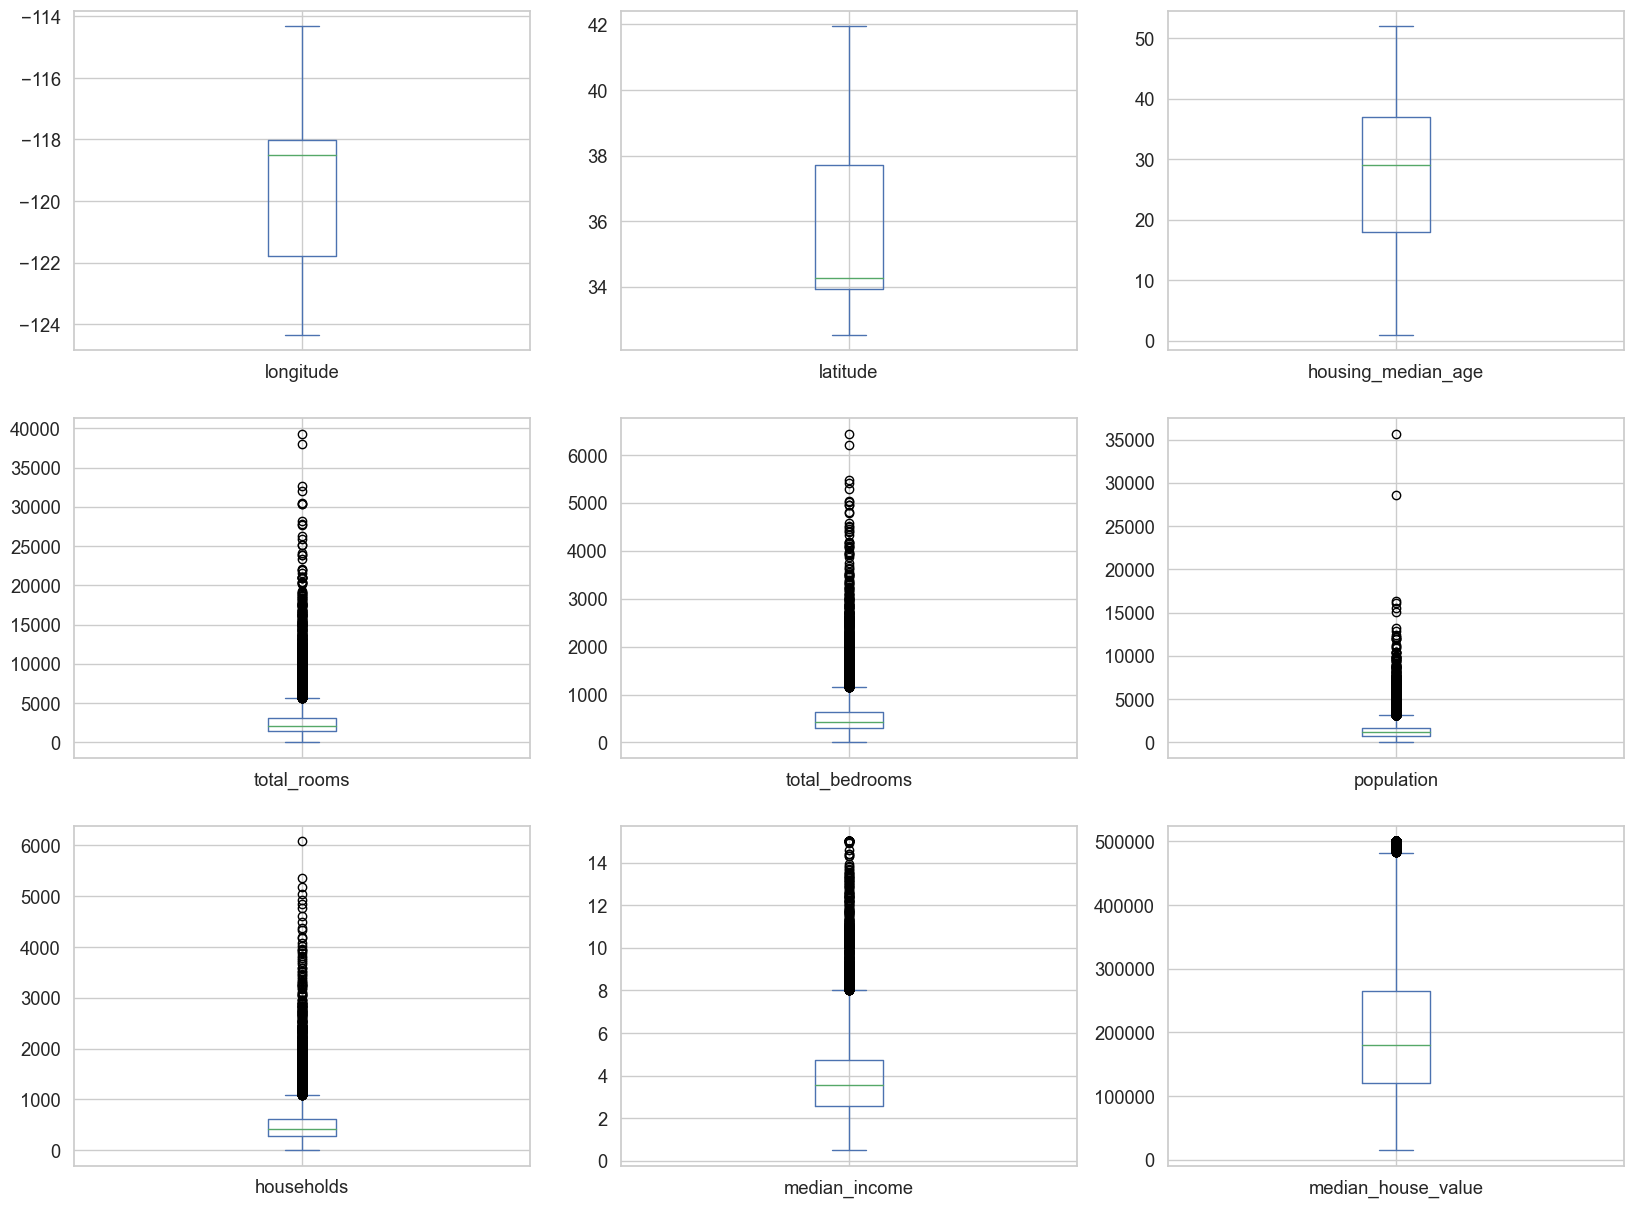

In [14]:
df.plot(kind = 'box',subplots=True,layout=(3,3),figsize=(20,15))
plt.show()

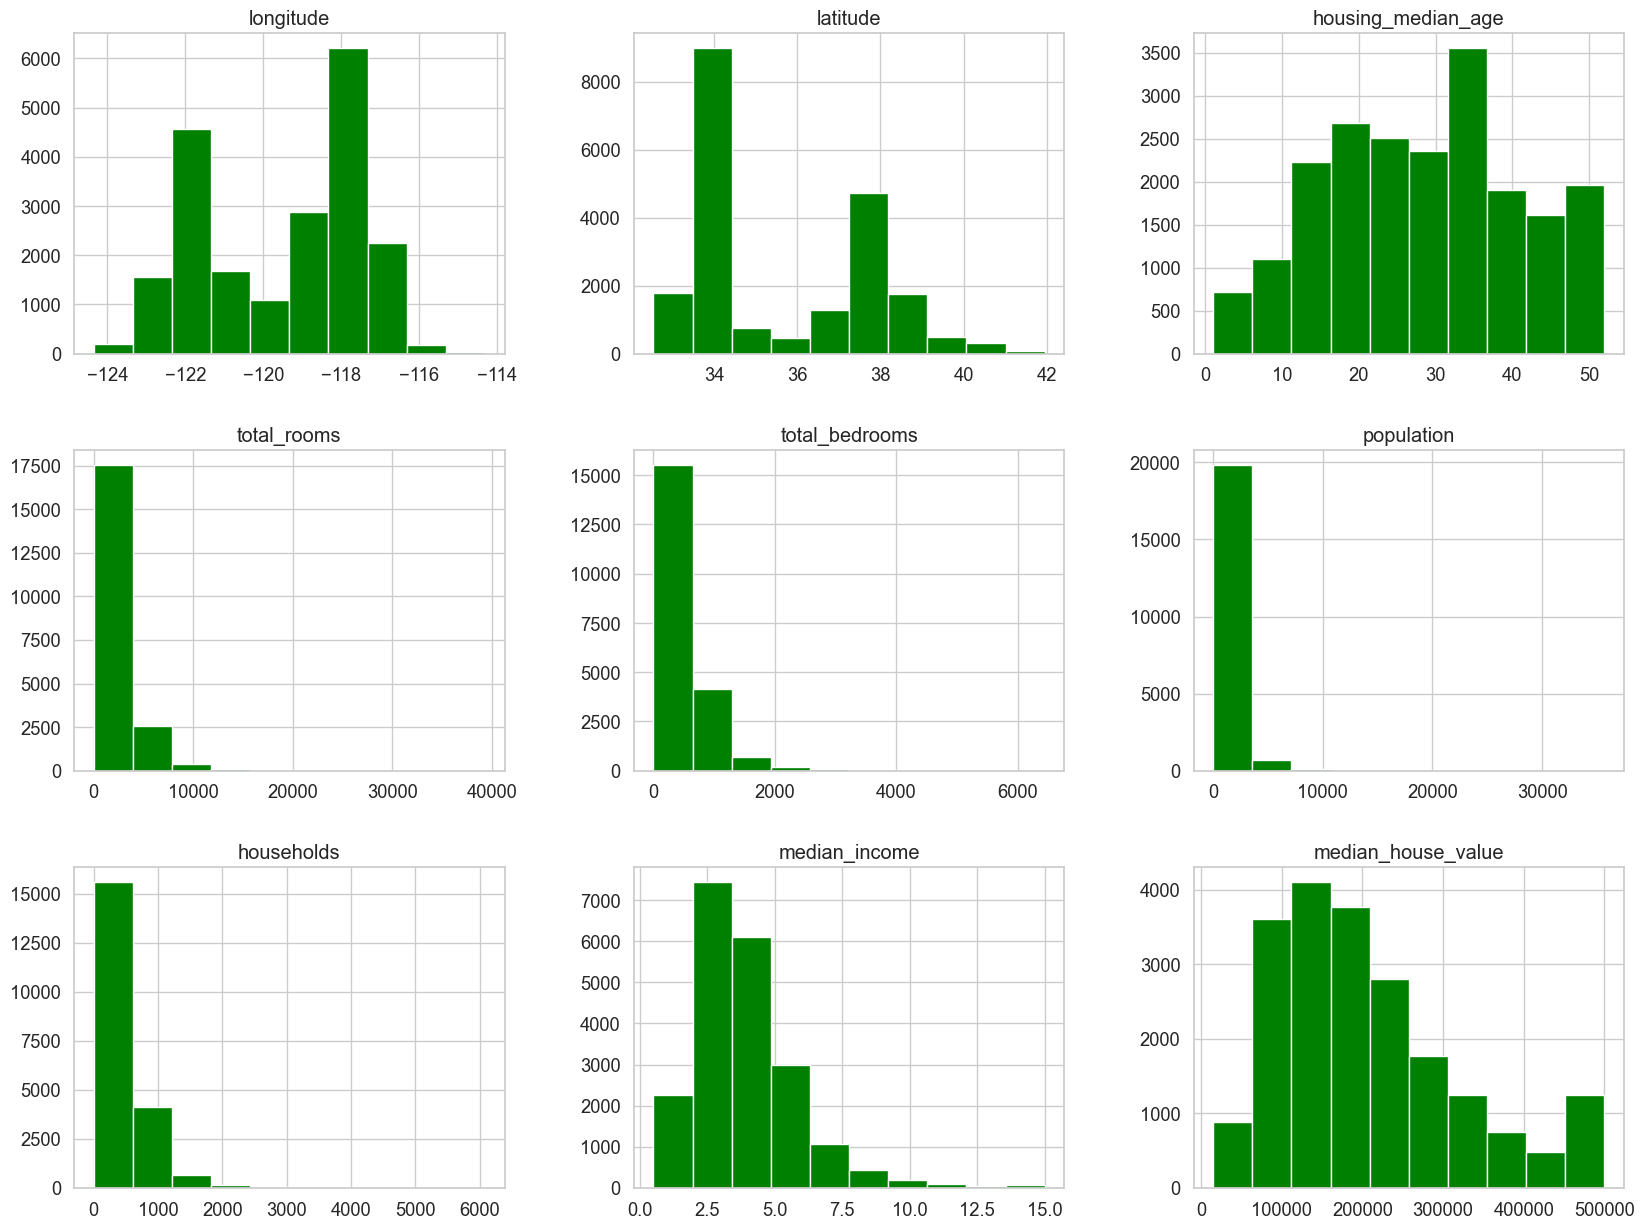

In [15]:
df.hist(figsize=(20,15),color="Green")
plt.show()

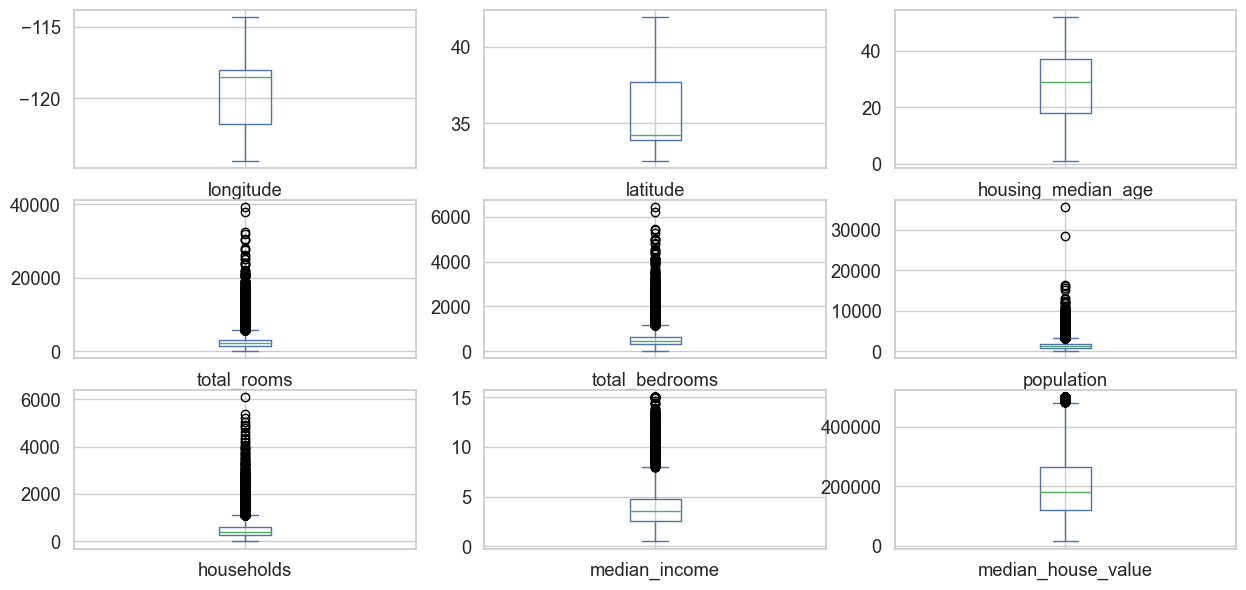

In [16]:
df.plot(kind='box',layout=(3,3),subplots=True,figsize=(15,7))
plt.show()

## **Outliers Remove**

In [17]:
import pandas as pd

# Assuming your dataframe is named df

# Calculate Q1 and Q3 for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 *IQR

# Create a boolean mask to identify outliers
df = df[(df >=lower_bound) & (df <=upper_bound)]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2200\3673467164.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2200\3673467164.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2200\3673467164.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[(df >=lower_bound) & (df <=upper_bound)]


## Checking the outliers of dataset

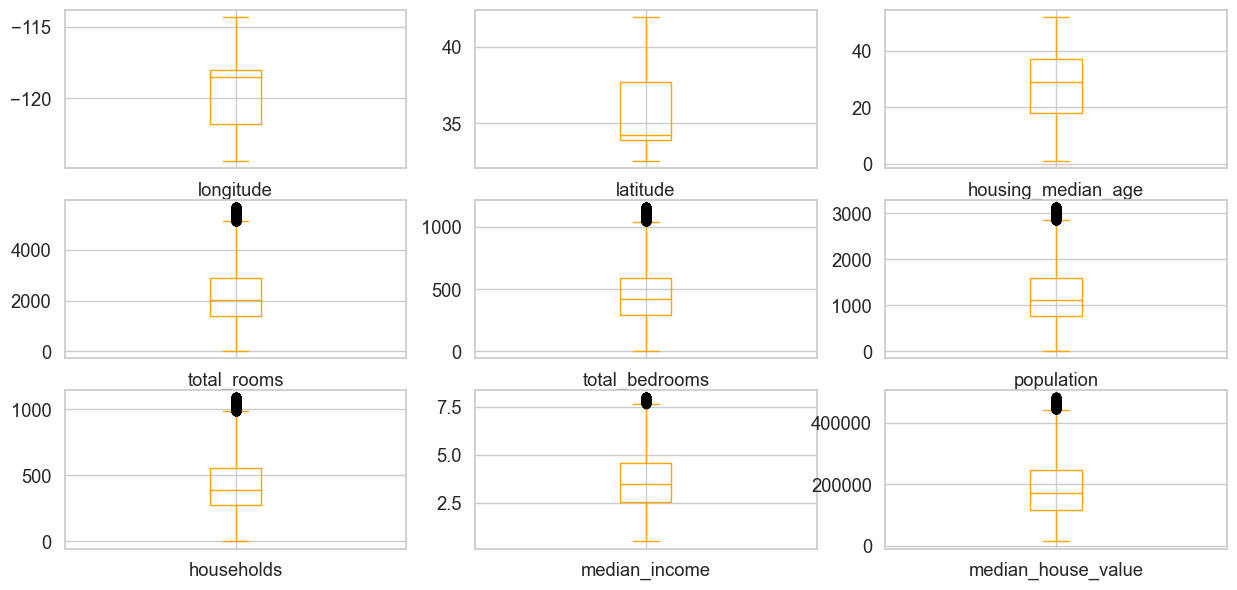

In [18]:
df.plot(kind ='box',subplots=True,color='orange',layout=(3,3),figsize=(15,7))
plt.show()

In [19]:
df.shape

(20640, 10)

In [20]:
df.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms            1287
total_bedrooms         1306
population             1196
households             1220
median_income           681
median_house_value     1071
ocean_proximity       20640
dtype: int64

In [21]:
df['ocean_proximity'].nunique()

0

In [22]:
# # Assuming you have a DataFrame named 'df' with multiple columns

# # Calculate the IQR for each column
# iqr = df.quantile(0.75) - df.quantile(0.25)

# # Apply the IQR on the entire dataset
# df = df[(df >= df.quantile(0.25) - 1.5 * iqr) & (df <= df.quantile(0.75) + 1.5 * iqr)]

In [23]:
# df_q1 = df.quantile(0.25)
# df_q3 = df.quantile(0.75)

# df_iqr = df_q3 - df_q1
# lower_bound = df_q3-1.5*df_iqr
# upper_bound = df_q3+1.5*df_iqr
# df = df[(df>= lower_bound) & (df <= upper_bound)]

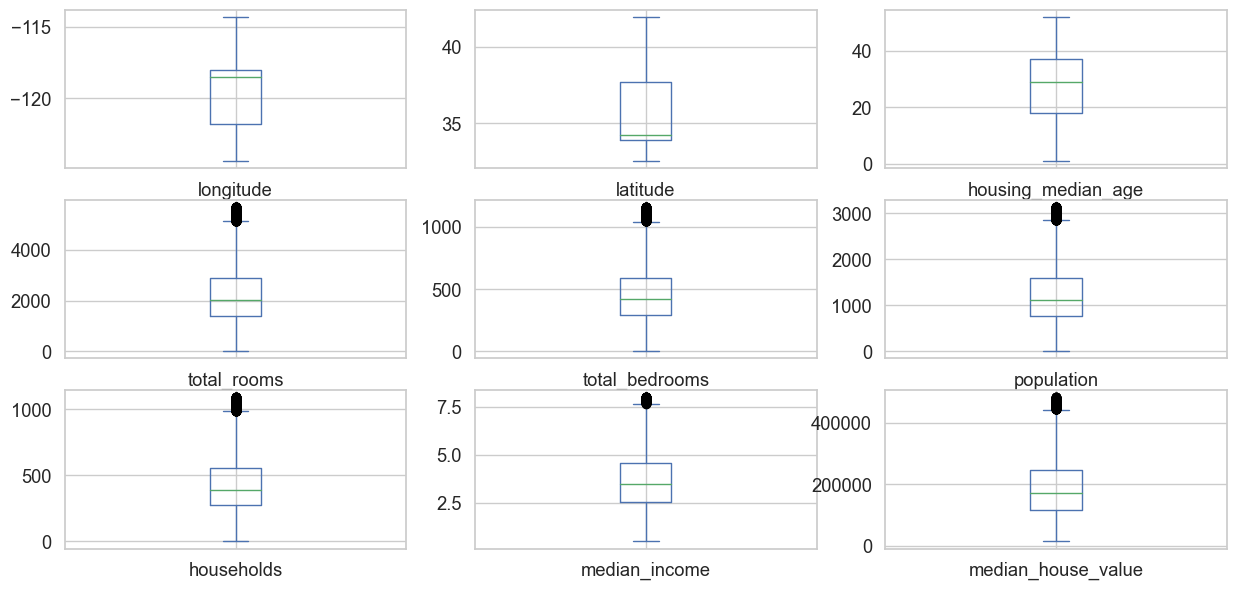

In [24]:
df.plot(kind="box",subplots=True,layout=(3,3),figsize=(15,7))
plt.show()

In [25]:
df.shape

(20640, 10)

## Exploratory Data Analysis (EDA)

In [26]:
df.isnull().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms            1287
total_bedrooms         1306
population             1196
households             1220
median_income           681
median_house_value     1071
ocean_proximity       20640
dtype: int64